In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\Documents\PGA 30\Machine Learning\Machine Learning Project\Linear Regression Project\Medical_Cost_Prediction.csv")
df

,age,sex,bmi,smoking_status,alcohol_use,diabetes,heart_disease,blood_pressure,cholesterol,physical_activity_level,hospital_visits,medications,medical_cost
0,44,male,19.8,non-smoker,yes,no,no,123.0,178.0,high,0,0,3714.78
1,57,female,27.7,non-smoker,no,no,no,123.0,183.0,moderate,2,0,4713.37
2,22,female,28.8,non-smoker,no,no,no,128.0,140.0,low,0,0,3802.24
3,34,female,23.7,smoker,yes,no,no,NaN,175.0,moderate,1,1,9761.02
4,43,female,22.8,non-smoker,no,no,no,113.0,159.0,high,1,0,2768.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,18,male,32.2,smoker,yes,no,no,101.0,157.0,low,1,0,10556.39
9996,29,female,25.6,non-smoker,no,no,no,121.0,123.0,moderate,0,0,200.00
9997,34,female,24.8,non-smoker,no,no,no,112.0,156.0,high,0,1,1289.51
9998,41,male,28.9,non-smoker,yes,no,no,97.0,134.0,low,1,0,5550.76


In [4]:
df.isnull().sum()

age                          0
sex                          0
bmi                        496
smoking_status               0
alcohol_use                  0
diabetes                     0
heart_disease                0
blood_pressure             789
cholesterol                300
physical_activity_level    600
hospital_visits              0
medications                  0
medical_cost                 0
dtype: int64

In [5]:
df['bmi'] = df['bmi'].fillna(
    df.groupby(['sex', 'smoking_status'])['bmi']
      .transform(lambda x: x.mode()[0]))


In [6]:
df.isnull().sum()

age                          0
sex                          0
bmi                          0
smoking_status               0
alcohol_use                  0
diabetes                     0
heart_disease                0
blood_pressure             789
cholesterol                300
physical_activity_level    600
hospital_visits              0
medications                  0
medical_cost                 0
dtype: int64

In [7]:
df['blood_pressure'] = df['blood_pressure'].fillna(
    df.groupby(['age','diabetes','heart_disease'])['blood_pressure'].transform('median'))


In [8]:
df.isnull().sum()

age                          0
sex                          0
bmi                          0
smoking_status               0
alcohol_use                  0
diabetes                     0
heart_disease                0
blood_pressure               2
cholesterol                300
physical_activity_level    600
hospital_visits              0
medications                  0
medical_cost                 0
dtype: int64

In [9]:
df['physical_activity_level'] = df['physical_activity_level'].fillna(
    df.groupby(['age','sex'])['physical_activity_level'].transform(lambda x: x.mode()[0]))


In [10]:
df.isnull().sum()

age                          0
sex                          0
bmi                          0
smoking_status               0
alcohol_use                  0
diabetes                     0
heart_disease                0
blood_pressure               2
cholesterol                300
physical_activity_level      0
hospital_visits              0
medications                  0
medical_cost                 0
dtype: int64

In [11]:
df['cholesterol'] = df['cholesterol'].fillna(
    df.groupby(['sex','physical_activity_level'])['cholesterol'].transform('median'))


In [12]:
df.isnull().sum()

age                        0
sex                        0
bmi                        0
smoking_status             0
alcohol_use                0
diabetes                   0
heart_disease              0
blood_pressure             2
cholesterol                0
physical_activity_level    0
hospital_visits            0
medications                0
medical_cost               0
dtype: int64

In [13]:
df['blood_pressure'] = df['blood_pressure'].fillna(df['blood_pressure'].median())

## Graph 1 :- Gender Distribution

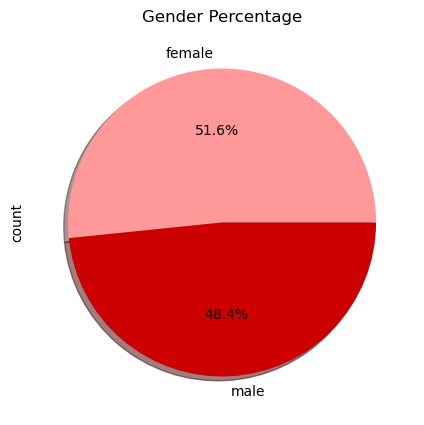

In [14]:
plt.figure(figsize=(10,5))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = ["#FF9999", "#CC0000"])
plt.title("Gender Percentage")
plt.show() 

## Graph 2:- Smoking Status by Gender

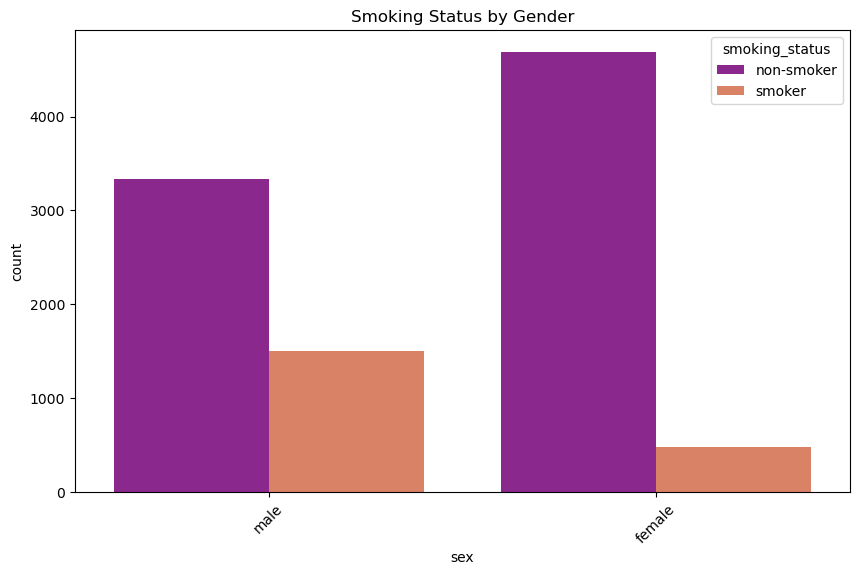

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="sex", hue='smoking_status', palette = "plasma")
plt.title("Smoking Status by Gender")
plt.xticks(rotation=45)
plt.show()

## Graph 3 :- BMI distribution by Gender

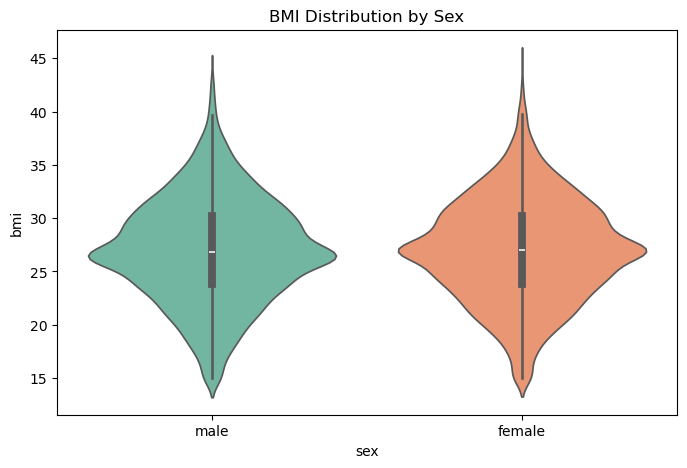

In [17]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='sex', y='bmi', palette="Set2")
plt.title("BMI Distribution by Sex")
plt.show()

## Graph 4 :- Which gender has higher medical cost

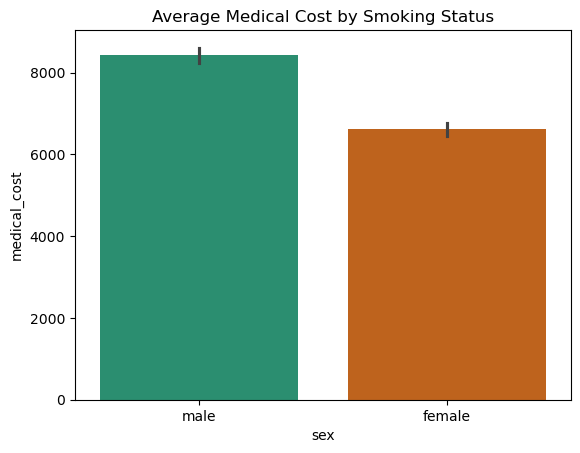

In [18]:
sns.barplot(x='sex', y='medical_cost', data=df, ci=95 , palette="Dark2")
plt.title("Average Medical Cost by Smoking Status")
plt.show()

## Graph 5 :- Blood pressure with Medical cost

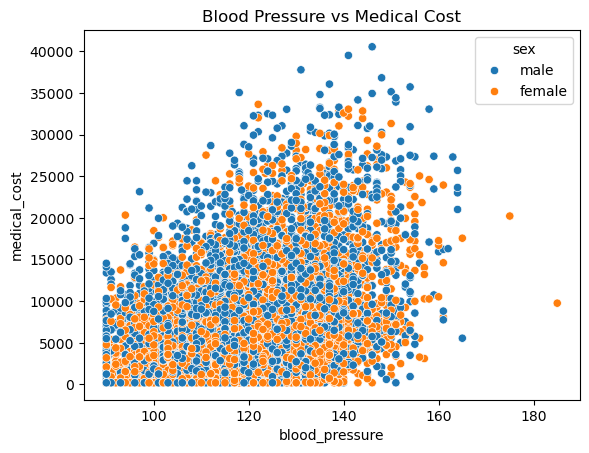

In [19]:
sns.scatterplot(x='blood_pressure', y='medical_cost', hue='sex', data=df)
plt.title("Blood Pressure vs Medical Cost")
plt.show()

## Graph 6 :- Blood pressure with gender

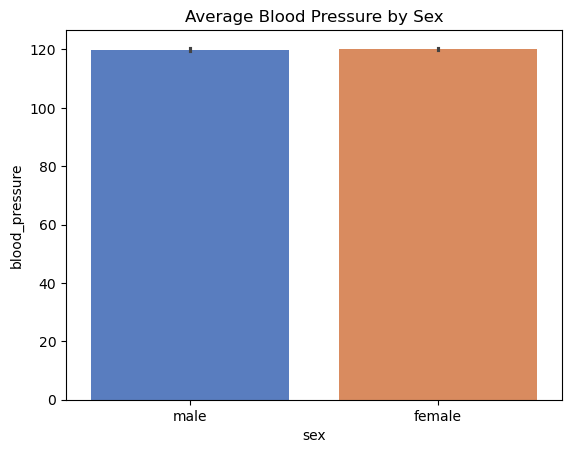

In [20]:
sns.barplot(x='sex', y='blood_pressure', data=df, ci=95, palette="muted")
plt.title("Average Blood Pressure by Sex")
plt.show()

## Graph 7 :- Male vs Diabetes

In [21]:
pd.crosstab(df['sex'], df['diabetes'])

diabetes,no,yes
sex,,
female,4480,682
male,4188,650


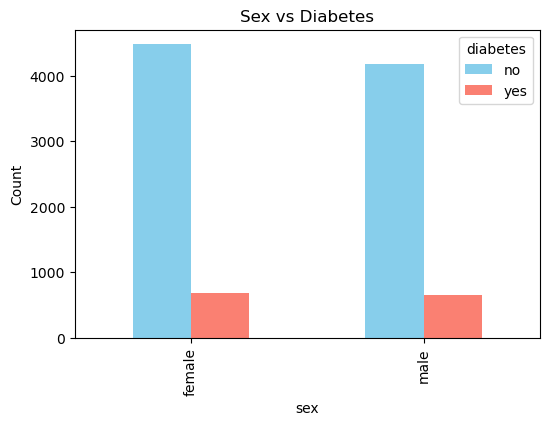

In [22]:
pd.crosstab(df['sex'], df['diabetes']).plot(kind='bar', figsize=(6,4), color=["skyblue", "salmon"])
plt.title("Sex vs Diabetes")
plt.ylabel("Count")
plt.show()

## Graph 8 :- Smoking status with Heart Diseases

In [23]:
pd.crosstab(df['smoking_status'], df['heart_disease'])

heart_disease,no,yes
smoking_status,,
non-smoker,7476,550
smoker,1734,240


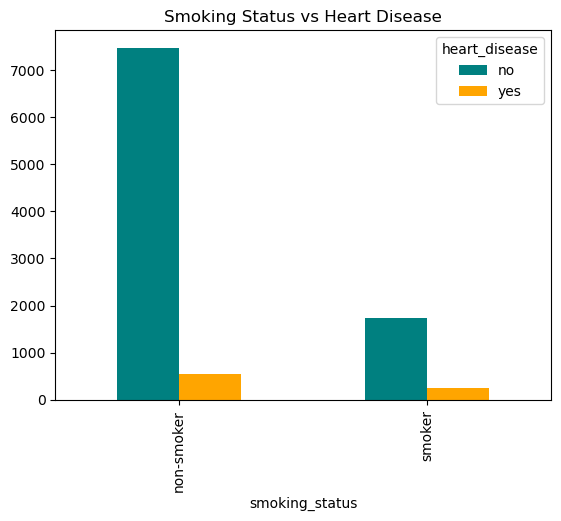

In [24]:
pd.crosstab(df['smoking_status'], df['heart_disease']).plot(kind='bar',color=["#008080", "#FFA500"] )
plt.title("Smoking Status vs Heart Disease")
plt.show()

## Graph 9 :- Correlation Heatmap

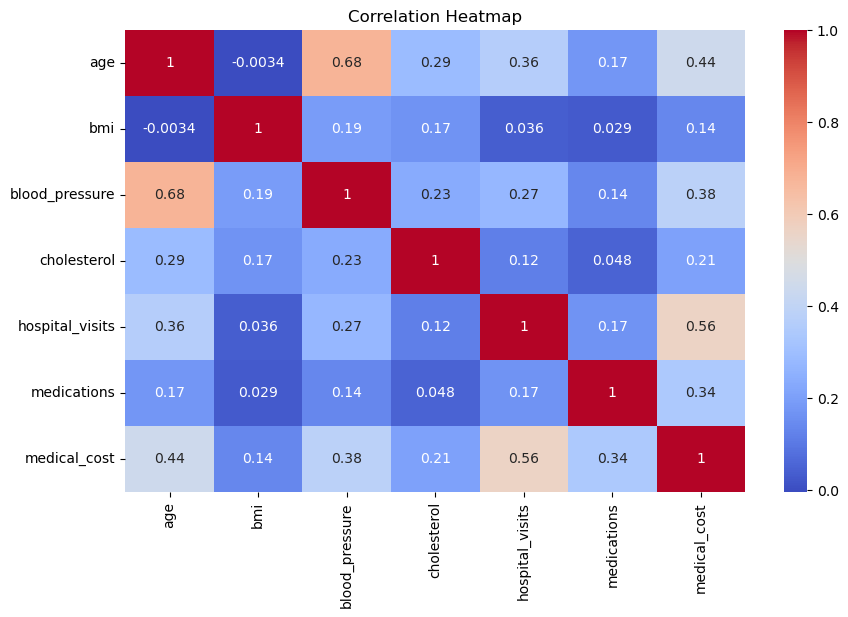

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
